In [289]:
# Importing Libraries Needed
import pulp as p
import matplotlib.pyplot as plt
import numpy as np

In [290]:
# Input Model
Lp_prob = p.LpProblem('Farmer_Profits', p.LpMaximize)

In [291]:
# Declare Decision Variables
x1 = p.LpVariable("x1", lowBound= 0) # Create a variable x1 >= 0 (Non-negativity)
x2 = p.LpVariable("x2", lowBound= 0) # Create a variable x1 >= 0 (Non-negativity)

In [292]:
# Declare Objective Function
Lp_prob += 100*x1 + 120*x2

In [293]:
# Declare Constraints
Lp_prob += x1 + x2 <= 20 # Land
Lp_prob += 30*x1 + 20*x2 <= 480 # Cost
Lp_prob += x1 + 2*x2 <= 36 # Manpower

In [294]:
print(Lp_prob)

Farmer_Profits:
MAXIMIZE
100*x1 + 120*x2 + 0
SUBJECT TO
_C1: x1 + x2 <= 20

_C2: 30 x1 + 20 x2 <= 480

_C3: x1 + 2 x2 <= 36

VARIABLES
x1 Continuous
x2 Continuous



In [295]:
status = Lp_prob.solve()
print(p.LpStatus[status])

Optimal


In [296]:
print("x1 =", p.value(x1))
print("x2 =", p.value(x2))
print("Objective = ", p.value(Lp_prob.objective))

x1 = 4.0
x2 = 16.0
Objective =  2320.0


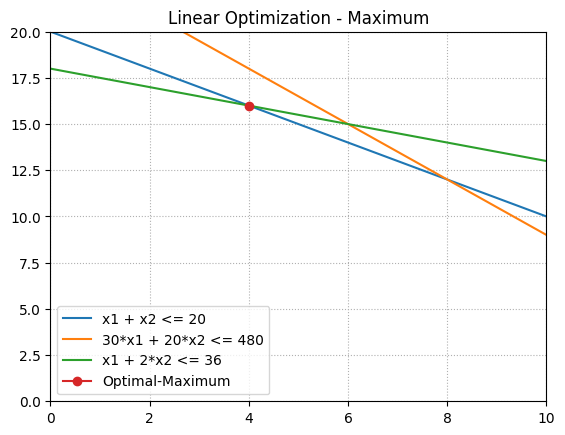

In [297]:
# Graph (Illustration)

# Lp_prob += x1 + x2 <= 20 # Land
# Lp_prob += 30*x1 + 20*x2 <= 480 # Cost
# Lp_prob += x1 + 2*x2 <= 36 # Manpower

# Make range of X values
x = np.arange(0, 30)

# Plotting the Constraints
plt.plot(x, 20 - x, label = "x1 + x2 <= 20")
plt.plot(x, (480-30*x)/20, label = "30*x1 + 20*x2 <= 480")
plt.plot(x, (36 - x)/2, label ="x1 + 2*x2 <= 36")

# Plot the Optimized Point
plt.plot(p.value(x1), p.value(x2), marker = "o", label = "Optimal-Maximum")

plt.title("Linear Optimization - Maximum")
plt.axis([0, 10, 0, 20])
plt.grid(True, linestyle = ':')
plt.legend()
plt.show()